In [8]:
import pandas as pd

df = pd.read_csv (r'C:\Users\Vyacheslav_Stecenko\Documents\PythonCourse\Jupiter\olympics.csv', skiprows=4)
#pd.set_option('display.max_columns', None)
df.head(6)
#print (df)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze


### На какой дистанции Jesse Owens выйграл медаль?

In [72]:
 df[(df["Athlete"].str.lower().str.contains("jesse") & df["Athlete"].str.lower().str.contains("owens")) 
   & (df["Medal"] == "Gold") & (df["Event"].str.contains("0m"))]


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold


##### Какая страна выйграла большинство золотых медалей мужчинами в
##### бадминтоне? Отсортировать результат в алфавитном порядке по имени игрока.

In [154]:
fdf = df[(df["Gender"] == "Men") & (df["Medal"] == "Gold") &  (df["Discipline"] == "Badminton")]
gdf = fdf.groupby("NOC").size().reset_index(name= 'Count').nlargest(1,'Count')
pd.merge(fdf, gdf, on="NOC").sort_values(by=['Athlete'])


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Count
0,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold,8
3,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold,8
5,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold,8
6,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold,8
1,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold,8
7,Beijing,2008,Badminton,Badminton,"SETIAWAN, Hendra",INA,Men,doubles,M,Gold,8
2,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold,8
4,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,M,Gold,8


#### - Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [160]:
fdf = df[(df["Edition"] >= 1984) & (df["Edition"] <= 2008)]
gdf = fdf.groupby("NOC").size().reset_index(name= 'Count').nlargest(3,'Count')
gdf

,NOC,Count
117,USA,1837
5,AUS,762
41,GER,691


##### - Покажите мужчин золотых медалистов по 100m. Выведите результаты по
##### убыванию года выйгрыша. Покажите город в котором проходила олимпиала,
##### год, имя атлета и страну за которую он выступал. 

In [168]:
fdf = df[(df["Gender"] == "Men") & (df["Medal"] == "Gold") & (df["Event"] == "100m")]
fdf[['City','Edition', 'Athlete', 'NOC']].sort_values(by=['Edition'] , ascending=False)

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


#### - Используя groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

Text(0, 0.5, 'Num of medals')

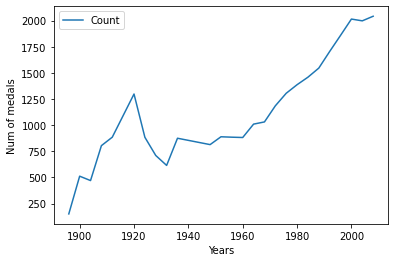

In [24]:
import matplotlib.pyplot as plt
gdf = df.groupby("Edition").size().reset_index(name= 'Count')
ax = gdf.plot(x="Edition", y='Count')
ax.set_xlabel("Years")
ax.set_ylabel("Num of medals")



##### Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. 
##### Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [67]:
gdf = df.groupby("NOC").size().reset_index(name= 'Count')
fldf = df.groupby(["NOC"]).agg({"Edition": ['min', 'max','count']})
fldf.rename(columns={'min':'FirstMedal', 'max':'LastMedal','count':'CountMedals'}).sort_values(by=['NOC'])


Edition                      
    FirstMedal LastMedal CountMedals
NOC                                 
AFG       2008      2008           1
AHO       1988      1988           1
ALG       1984      2008          14
ANZ       1908      1912          29
ARG       1924      2008         239
..         ...       ...         ...
VIE       2000      2008           2
YUG       1924      2000         435
ZAM       1984      1996           2
ZIM       1980      2008          23
ZZX       1896      1904          48

[138 rows x 3 columns]

##### - Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

Text(0.5, 0, 'Gender')

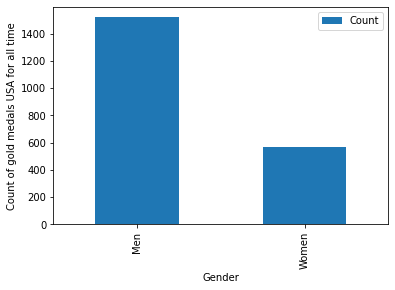

In [80]:
ax = df[(df["NOC"] == "USA") & (df["Medal"] == "Gold")].groupby("Gender").size().reset_index(name= 'Count').plot(kind='bar',x="Gender", y='Count')
ax.set_ylabel("Count of gold medals USA for all time")
ax.set_xlabel("Gender")

##### - Постройте график 5 атлетов которые выйграли большинство золотых медалей.

Text(0.5, 0, 'Name of athlete')

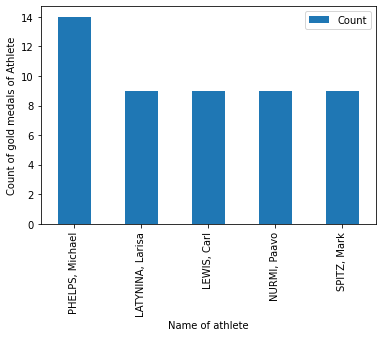

In [92]:
ax = df[(df["Medal"] == "Gold")].groupby("Athlete").size().reset_index(name= 'Count').nlargest(5,'Count').plot(kind='bar',x="Athlete", y='Count')
ax.set_ylabel("Count of gold medals of Athlete")
ax.set_xlabel("Name of athlete")

##### - Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей? Включите дисциплину атлета.

In [172]:
fdf = df.groupby(["Edition","Athlete","Discipline"]).size().reset_index(name= 'Count').sort_values(by=['Edition','Count'], ascending=[True, False])
#fdf
rdf = fdf.assign(rn=fdf.sort_values(["Count"], ascending=False).groupby(["Edition"]).cumcount()+ 1).query("rn == 1").sort_values(["Edition", "rn"]).rename(columns={'Edition':'Year', 'Athlete':'Athlete Name','Count':'Count Medals'})
rdf[["Year","Athlete Name","Discipline","Count Medals"]].head(10000).style.hide_index()

Year,Athlete Name,Discipline,Count Medals
1896,"WEINGÄRTNER, Hermann",Artistic G.,6
1900,"TEWKSBURY, Walter B. John",Athletics,5
1904,"DOWNING, Burton",Cycling Track,6
1908,"JONES, Benjamin",Cycling Track,3
1912,"CARLBERG, G. Vilhelm",Shooting,5
1920,"SPOONER, Lloyd Spencer",Shooting,7
1924,"RITOLA, Ville",Athletics,6
1928,"MIEZ, Georges",Artistic G.,4
1932,"PELLE, István",Artistic G.,4
1936,"FREY, Konrad",Artistic G.,6
